In [1]:
import pandas as pd

In [2]:
BASE_FOLDER = './outputs/evaluation'

In [3]:
def load_data(prefix, traffic):
    df_single_episode = pd.read_csv(f'{BASE_FOLDER}/{prefix}_1_episode_{traffic}.csv')
    df_single_episode = df_single_episode.set_index('step')
    df_single_episode = df_single_episode.drop(columns=['cumulative_reward'])
    
    df_multiple_episodes = pd.read_csv(f'{BASE_FOLDER}/{prefix}_100_episode_{traffic}.csv')
    df_multiple_episodes = df_multiple_episodes.set_index('episode')
    # df_multiple_episodes = df_multiple_episodes.drop(columns=['cumulative_reward'])
    return df_single_episode, df_multiple_episodes

In [4]:
df_single_episode_forced, df_multiple_episodes_forced = load_data('oc_forced_500k_steps', 'custom-2way-single-intersection')

In [5]:
df_single_episode_forced.plot(grid=True, figsize=(15,15))

<AxesSubplot: xlabel='step'>

In [6]:
df_single_episode_forced

,option,obs,termination_prob,should_terminate,greedy_option,average_cumulative_reward,waiting_time,speed,lane_density
step,,,,,,,,,
5.0,0,"1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1056...",1.0,True,1,0.000000,0.000000,13.392909,0.264178
10.0,1,"1.0, 0.0, 0.0, 0.0, 1.0, 0.052835505, 0.052835...",1.0,True,0,0.000000,0.000000,12.718430,0.845368
15.0,0,"0.0, 0.0, 0.0, 1.0, 0.0, 0.052835505, 0.105671...",1.0,True,1,-0.001500,0.136364,11.605895,1.056710
20.0,1,"0.0, 0.0, 0.0, 1.0, 1.0, 0.052835505, 0.158506...",1.0,True,0,-0.009425,0.640000,7.810272,1.109546
25.0,0,"0.0, 0.0, 0.0, 1.0, 1.0, 0.052835505, 0.158506...",1.0,True,1,-0.040454,2.100000,6.697429,1.320888
...,...,...,...,...,...,...,...,...,...
4980.0,1,"0.0, 1.0, 0.0, 0.0, 1.0, 0.9510391, 0.8453681,...",1.0,True,0,-75.552143,12.690141,1.640431,6.966538
4985.0,0,"0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.6868616, 1.0, ...",1.0,True,1,-75.499036,13.697183,1.744719,6.853117
4990.0,1,"0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.6868616, 0.951...",1.0,True,0,-75.558584,13.373239,1.579880,6.966538


In [8]:
df_single_episode_oc, df_multiple_episodes_oc = load_data('oc_2way_500k_steps', 'custom-2way-single-intersection')

In [10]:
df_single_episode_oc.plot(grid=True, figsize=(15,15))

<Axes: xlabel='step'>

In [8]:
# Verify that the metrics are stable across multiple episodes

In [11]:
df_multiple_episodes_oc.plot(grid=True, figsize=(15,15))

<Axes: xlabel='step'>

In [7]:
# Verify that the metrics are stable across multiple episodes

<Axes: xlabel='episode'>

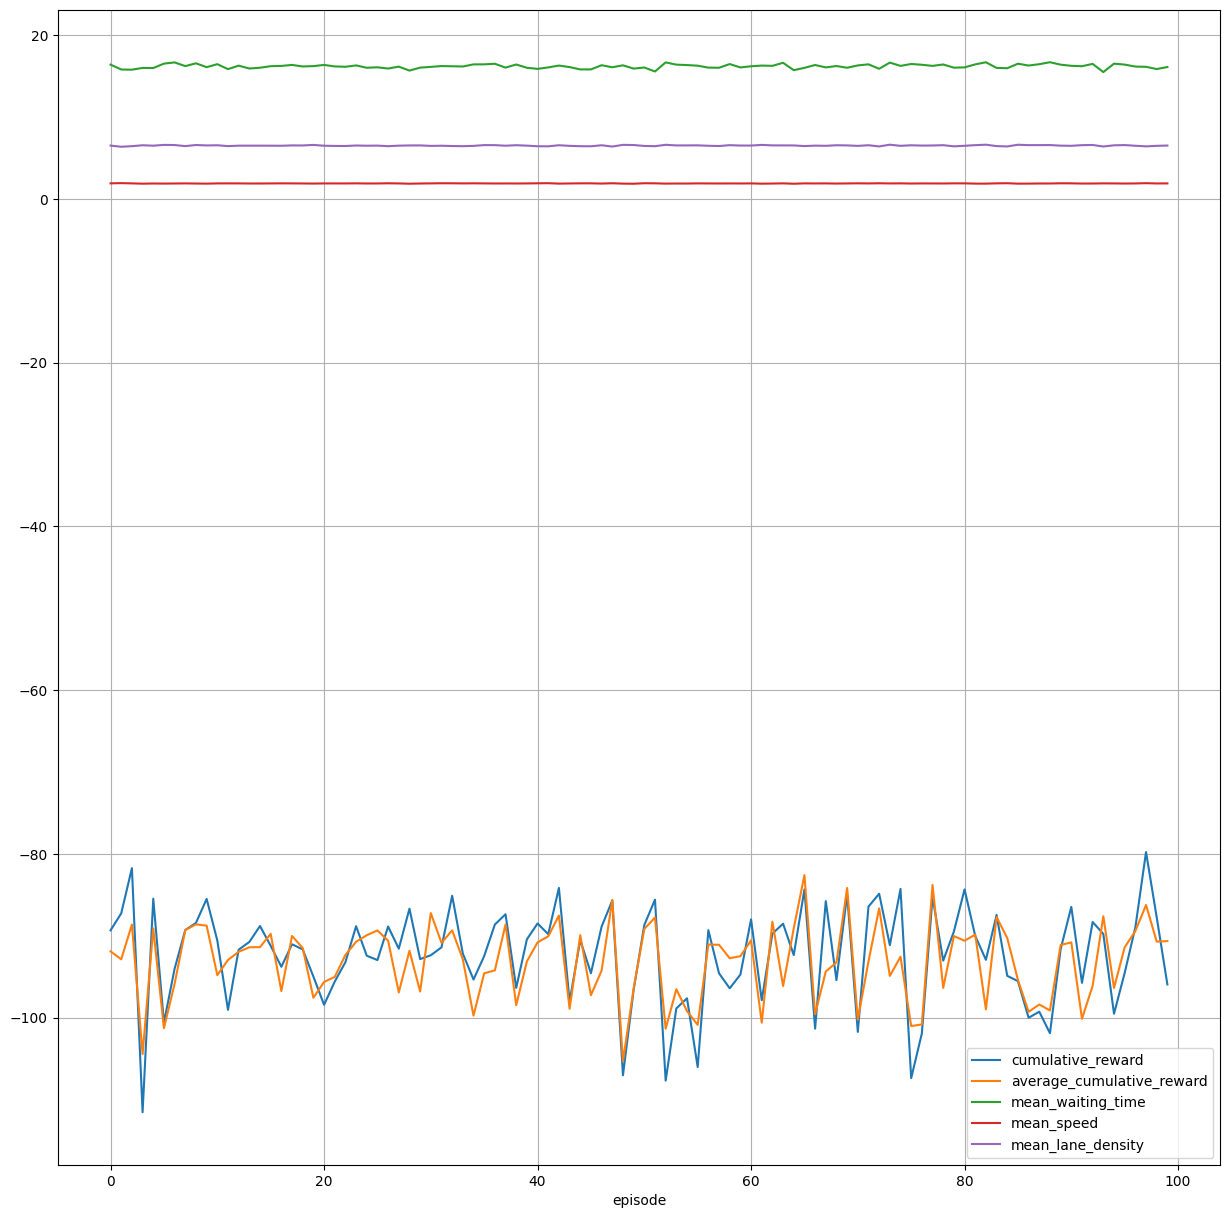

In [11]:
df_multiple_episodes_oc.plot(grid=True, figsize=(15,15))

In [14]:
df_multiple_episodes_forced[['cumulative_reward', 'mean_lane_density']].mean()

cumulative_reward   -76.238700
mean_lane_density     6.815741
dtype: float64

In [13]:
df_multiple_episodes_oc[['cumulative_reward', 'mean_lane_density']].mean()

cumulative_reward   -92.334200
mean_lane_density     6.526162
dtype: float64